<a href="https://colab.research.google.com/github/GrmRy/Skripsi/blob/main/Outflow_Skripsi_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download Dataset

In [ ]:
!wget https://raw.githubusercontent.com/GrmRy/Skripsi/main/Dataset.csv

--2023-11-27 17:24:49--  https://raw.githubusercontent.com/GrmRy/Skripsi/main/Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17767 (17K) [text/plain]
Saving to: ‘Dataset.csv.2’

Dataset.csv.2       100%[===================>]  17.35K  --.-KB/s    in 0.001s  

2023-11-27 17:24:49 (12.7 MB/s) - ‘Dataset.csv.2’ saved [17767/17767]



## Import Libraries

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

from tensorflow.keras.layers import Dense, LSTM,Dropout

import warnings
warnings.filterwarnings('ignore')

## Data Processing

In [ ]:
df=pd.read_csv("Dataset.csv",parse_dates=["Tanggal"],index_col=[0])
df.head(30)

,Inflow (m/s),Outflow(m/s),Curah Hujan (mm)
Tanggal,,,
2021-01-01,106.15,0.00,1.6
2021-01-02,104.53,0.00,3.5
2021-01-03,29.17,0.00,0.0
2021-01-04,44.03,0.00,2.3
2021-01-05,48.07,4.32,8.0
2021-01-06,71.51,0.00,8888.0
2021-01-07,64.15,6.53,0.0
2021-01-08,67.52,8.92,1.0
2021-01-09,28.10,0.00,43.5


In [ ]:
df=df.drop(["Curah Hujan (mm)","Inflow (m/s)"],axis=1)

<Axes: xlabel='Tanggal'>

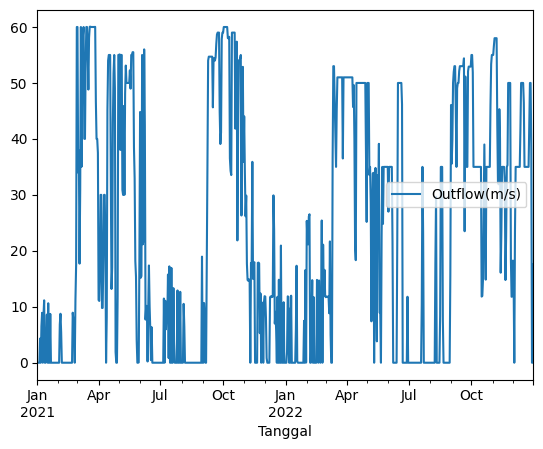

In [ ]:
results = df
results.plot()

In [ ]:
df.head()

,Outflow(m/s)
Tanggal,
2021-01-01,0.00
2021-01-02,0.00
2021-01-03,0.00
2021-01-04,0.00
2021-01-05,4.32


In [ ]:
df.isnull().sum()

Outflow(m/s)    0
dtype: int64

In [ ]:
df.head(10)

,Outflow(m/s)
Tanggal,
2021-01-01,0.00
2021-01-02,0.00
2021-01-03,0.00
2021-01-04,0.00
2021-01-05,4.32
2021-01-06,0.00
2021-01-07,6.53
2021-01-08,8.92
2021-01-09,0.00


In [ ]:
n = len(df)

train_df = df[0:int(n*0.8)]
test_df = df[int(n*0.8):]

train_df.shape, test_df.shape

((584, 1), (146, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


train_df = scaler.fit_transform(train_df)
test_df = scaler.fit_transform(test_df)

In [ ]:
def createDataset(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
n_past=30
trainX,trainY=createDataset(train_df,n_past)

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (554, 30, 1)
trainY Shape--  (554,)


##Train Model

In [ ]:
model = Sequential()
model.add(LSTM(128,activation='relu',return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2] )))
model.add(Dropout(0.2))
model.add(LSTM(64,activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 128)           66560     
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116033 (453.25 KB)
Trainable params: 116033 (453.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=["mse"])

history=model.fit(trainX, trainY, epochs = 150, batch_size = 64, validation_split=0.1, verbose=1)
print("Hasil Training Model Outflow")

Epoch 1/150
8/8 [==============================] - 5s 159ms/step - loss: 0.2238 - mse: 0.2238 - val_loss: 0.0724 - val_mse: 0.0724
Epoch 2/150
8/8 [==============================] - 1s 108ms/step - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 3/150
8/8 [==============================] - 1s 102ms/step - loss: 0.0735 - mse: 0.0735 - val_loss: 0.0773 - val_mse: 0.0773
Epoch 4/150
8/8 [==============================] - 1s 101ms/step - loss: 0.0665 - mse: 0.0665 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 5/150
8/8 [==============================] - 1s 101ms/step - loss: 0.0639 - mse: 0.0639 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 6/150
8/8 [==============================] - 1s 106ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0823 - val_mse: 0.0823
Epoch 7/150
8/8 [==============================] - 1s 115ms/step - loss: 0.0554 - mse: 0.0554 - val_loss: 0.0723 - val_mse: 0.0723
Epoch 8/150
8/8 [==============================] - 1s 115ms/step - loss: 0.0529 - m

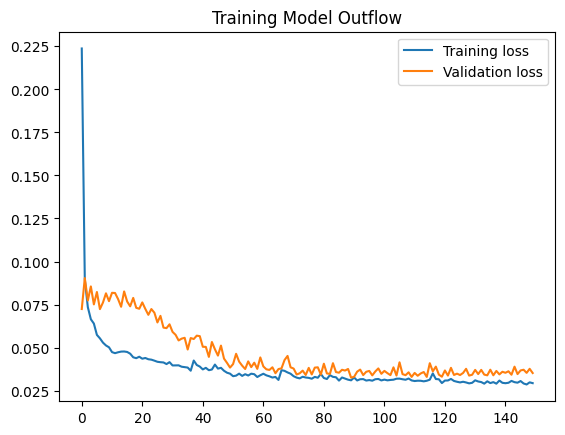

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training Model Outflow')
plt.legend()

In [ ]:
testX,testY=createDataset(test_df,30)

In [ ]:
predictions = model.predict(testX)

4/4 [==============================] - 0s 21ms/step


In [ ]:
pred=scaler.inverse_transform(predictions)

In [ ]:
original_copies_array = np.repeat(testY,3, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),3)))[:,0]


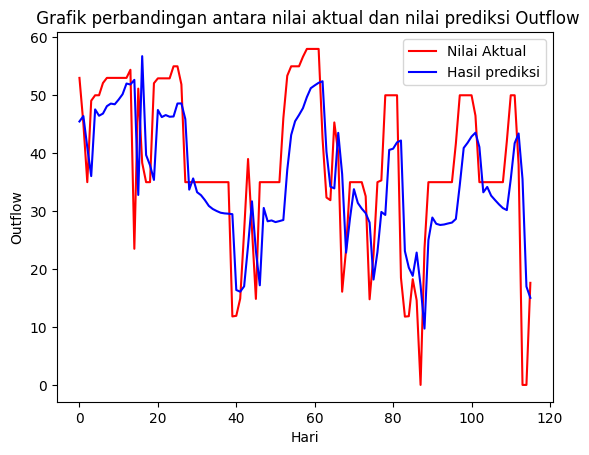

In [ ]:
plt.plot(original, color = 'red', label = 'Nilai Aktual')
plt.plot(pred, color = 'blue', label = 'Hasil prediksi')
plt.title(' Grafik perbandingan antara nilai aktual dan nilai prediksi Outflow')
plt.xlabel('Hari')
plt.ylabel('Outflow')
plt.legend()
plt.show()

In [ ]:
# Hasil testing parameter Outflow
from sklearn.metrics import mean_squared_error
mean_squared_error(testY, predictions)

0.029407771555896224

##Forecast The future

In [ ]:
future_df = scaler.fit_transform(df)
predictX,predictY=createDataset(future_df,30)

In [ ]:
n_future = 365
prediction=model.predict(predictX[-n_future:])
prediction_copies = np.repeat(prediction, train_df.shape[1], axis=-1)
y_future = scaler.inverse_transform(prediction_copies)[:,0]

12/12 [==============================] - 0s 21ms/step


In [ ]:
df_past = df[['Outflow(m/s)']].reset_index()
df_past.rename(columns={'index': 'Date'}, inplace=True)
df_past['Tanggal'] = pd.to_datetime(df_past['Tanggal'])
df_past['Forecast'] = np.nan

df_future = pd.DataFrame(columns=['Tanggal', 'Outflow(m/s)', 'Forecast'])
df_future['Tanggal'] = pd.date_range(start=df_past['Tanggal'].iloc[-1] + pd.Timedelta(days=1), periods=n_future)
df_future['Forecast'] = y_future.flatten()
df_future['Outflow(m/s)'] = np.nan

<Axes: title={'center': 'Outflow waduk kedungombo'}, xlabel='Tanggal'>

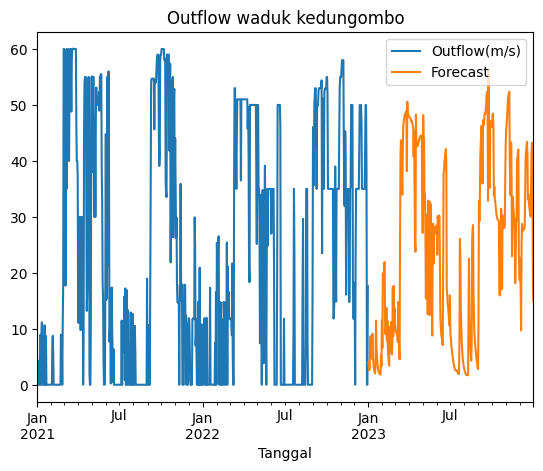

In [ ]:
results = df_past.append(df_future).set_index('Tanggal')
results.plot(title='Outflow waduk kedungombo')

In [ ]:
df_future=df_future.drop(['Outflow(m/s)'],axis=1)

In [ ]:
df_future.to_excel('Hasil prediksi Outflows.xlsx',index=True)